In [31]:
import numpy
import pandas
from random import shuffle

In [14]:
import nupic
from nupic.encoders import ScalarEncoder

In [12]:
# 22 bits with 3 active representing values 0 to 100
# clipInput=True makes values >100 encode the same as 100 (instead of throwing a ValueError)
# forced=True allows small values for `n` and `w`
enc = ScalarEncoder(n=22, w=3, minval=2.5, maxval=97.5, clipInput=True, forced=True)
print "3 =", enc.encode(3)
print "4 =", enc.encode(4)
print "5 =", enc.encode(5)

3 = [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
4 = [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
5 = [0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [267]:
# Encode maxval
print "100  =", enc.encode(100)
# See that any larger number gets the same encoding
print "1000 =", enc.encode(1000)

100  = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
1000 = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]


In [268]:
from nupic.encoders.random_distributed_scalar import RandomDistributedScalarEncoder

RandomDistributedScalarEncoder?

In [269]:
# 21 bits with 3 active with buckets of size 5
rdse = RandomDistributedScalarEncoder(n=21, w=3, resolution=5, offset=2.5)

print "3 =   ", rdse.encode(3)
print "4 =   ", rdse.encode(4)
print "5 =   ", rdse.encode(5)
print
print "100 = ", rdse.encode(100)
print "1000 =", rdse.encode(1000)

3 =    [0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
4 =    [0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
5 =    [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]

100 =  [0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
1000 = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0]


In [17]:
import datetime
from nupic.encoders.date import DateEncoder

DateEncoder?

In [29]:
import numpy
from nupic.research.spatial_pooler import SpatialPooler
sp = SpatialPooler(inputDimensions=(15,),
                   columnDimensions=(4,),
                   potentialRadius=15,
                   numActiveColumnsPerInhArea=1,
                   globalInhibition=True,
                   synPermActiveInc=0.03,
                   potentialPct=1.0)
for column in xrange(4):
    connected = numpy.zeros((15,), dtype="int")
    sp.getConnectedSynapses(column, connected)
    print connected

[0 0 0 1 0 0 1 0 0 1 0 0 0 0 1]
[1 0 1 0 1 1 1 1 1 1 0 1 1 0 1]
[1 1 1 0 0 0 1 1 0 1 1 0 0 1 0]
[1 0 0 0 0 1 0 0 0 1 1 1 1 1 0]


# Extract Data for Training Examples

# Encode Date

<code>
Day of Week (14 bits)
[1 1 1 0 0 0 0 0 0 0 0 0 0 0] Sun
[0 0 1 1 1 0 0 0 0 0 0 0 0 0] Mon
[0 0 0 0 1 1 1 0 0 0 0 0 0 0] Tue
[0 0 0 0 0 0 1 1 1 0 0 0 0 0] Wed
[0 0 0 0 0 0 0 0 1 1 1 0 0 0] Thu
[0 0 0 0 0 0 0 0 0 0 1 1 1 0] Fri
[1 0 0 0 0 0 0 0 0 0 0 0 1 1] Sat
Day of Month (63 bits)
[111000000000000000000000000000000000000000000000000000000000000] 1
[001110000000000000000000000000000000000000000000000000000000000] 2
[000011100000000000000000000000000000000000000000000000000000000] 3
...
[000000000000000000000000000000000000000000000000000000000011100] 30
[000000000000000000000000000000000000000000000000000000000000111] 31
First/Last Day of Month (3 bits)
[1 0 0] First
[0 1 0] Neither
[0 0 1] Last
Week of Month (12 bits)
[1 1 1 0 0 0 0 0 0 0 0 0] Wk 1
[0 0 1 1 1 0 0 0 0 0 0 0] Wk 2
[0 0 0 0 1 1 1 0 0 0 0 0] Wk 3
[0 0 0 0 0 0 1 1 1 0 0 0] Wk 4
[0 0 0 0 0 0 0 0 1 1 1 0] Wk 5
[1 0 0 0 0 0 0 0 0 0 1 1] Wk 6
Month of Year (24 bits)
[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] Jan
[0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] Feb
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] Mar
[0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] Apr
[0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0] May
[0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0] Jun
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0] Jul
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0] Aug
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0] Sep
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0] Oct
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0] Nov
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1] Dec
Quarter of Year (8 bits)
[1 1 1 0 0 0 0 0] Q1
[0 0 1 1 1 0 0 0] Q2
[0 0 0 0 1 1 1 0] Q3
[1 0 0 0 0 0 1 1] Q4
Half of Year
[1 0] H1 (2 bits)
[0 1] H2
Year of Decade (20 bits)
[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 0
[0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 1
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0] 2
[0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0] 3
[0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0] 4
[0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0] 5
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0] 6
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0] 7
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0] 8
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1] 9
</code>

In [15]:
import nupic
from nupic.encoders import ScalarEncoder
day_of_week_enc = ScalarEncoder(w=3, minval=0, maxval=7, radius=1.5, periodic=True, name="dayOfWeek", forced=True)
for d in range(0, 7):
    print str(day_of_week_enc.encode(d))

[1 1 0 0 0 0 0 0 0 0 0 0 0 1]
[0 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1]


In [16]:
day_of_month_enc = ScalarEncoder(w=3, minval=1, maxval=31, radius=1.5, periodic=False, name="dayOfMonth", forced=True)
for d in range(1, 32):
    print str(day_of_month_enc.encode(d)).replace("\n","").replace(" ","")

[111000000000000000000000000000000000000000000000000000000000000]
[001110000000000000000000000000000000000000000000000000000000000]
[000011100000000000000000000000000000000000000000000000000000000]
[000000111000000000000000000000000000000000000000000000000000000]
[000000001110000000000000000000000000000000000000000000000000000]
[000000000011100000000000000000000000000000000000000000000000000]
[000000000000111000000000000000000000000000000000000000000000000]
[000000000000001110000000000000000000000000000000000000000000000]
[000000000000000011100000000000000000000000000000000000000000000]
[000000000000000000111000000000000000000000000000000000000000000]
[000000000000000000001110000000000000000000000000000000000000000]
[000000000000000000000011100000000000000000000000000000000000000]
[000000000000000000000000111000000000000000000000000000000000000]
[000000000000000000000000001110000000000000000000000000000000000]
[000000000000000000000000000011100000000000000000000000000000000]
[000000000

In [17]:
print len('111000000000000000000000000000000000000000000000000000000000000')

63


In [18]:
first_last_of_month_enc = ScalarEncoder(w=1, minval=0, maxval=2, radius=1, periodic=False, name="firstLastOfMonth", forced=True)
for d in range(0, 3):
    print str(first_last_of_month_enc.encode(d))

[1 0 0]
[0 1 0]
[0 0 1]


In [19]:
week_of_month_enc = ScalarEncoder(w=3, minval=0, maxval=6, radius=1.5, periodic=True, name="weekOfMonth", forced=True)
for d in range(0, 6):
    print str(week_of_month_enc.encode(d))

[1 1 0 0 0 0 0 0 0 0 0 1]
[0 1 1 1 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 0 0 0 0 0 0]
[0 0 0 0 0 1 1 1 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 0 0]
[0 0 0 0 0 0 0 0 0 1 1 1]


In [20]:
month_of_year_enc = ScalarEncoder(w=3, minval=1, maxval=13, radius=1.5, periodic=True, name="monthOfYear", forced=True)
for d in range(1, 13):
    print str(month_of_year_enc.encode(d))

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]


In [21]:
quarter_of_year_enc = ScalarEncoder(w=3, minval=0, maxval=4, radius=1.5, periodic=True, name="quarterOfYear", forced=True)
for d in range(0, 4):
    print str(quarter_of_year_enc.encode(d))

[1 1 0 0 0 0 0 1]
[0 1 1 1 0 0 0 0]
[0 0 0 1 1 1 0 0]
[0 0 0 0 0 1 1 1]


In [22]:
half_of_year_enc = ScalarEncoder(w=1, minval=0, maxval=2, radius=1, periodic=True, name="halfOfYear", forced=True)
for d in range(0, 2):
    print str(half_of_year_enc.encode(d))

[1 0]
[0 1]


In [23]:
year_of_decade_enc = ScalarEncoder(w=3, minval=0, maxval=10, radius=1.5, periodic=True, name="yearOfDecade", forced=True)
for d in range(0, 10):
    print str(year_of_decade_enc.encode(d))

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]


In [24]:
import calendar
class Month(object):
    def __init__(self, date):
        monthrange = calendar.monthrange(date.year, date.month)
        self.first_day_of_week = monthrange[0]
        self.last_day = monthrange[1]
        self.quarter = (date.month - 1) // 3
        self.half = (date.month - 1) // 6


In [25]:
def get_week_of_month(date):
    month = Month(date)
    week_of_month = (date.day - 1 + month.first_day_of_week) // 7
    first_full_week_offset = 1 if month.first_day_of_week == 0 else 0  # month starts on Monday
    return week_of_month + first_full_week_offset

# for m in range(1,13):
#     for d in range(1, calendar.monthrange(2015, m)[1] + 1):
#         date = datetime.date(2015, m, d)
#         print date, get_week_of_month(date)

In [26]:
import calendar
[calendar.monthrange(year,month) for year in [2008] for month in range(1,13)]

[(1, 31),
 (4, 29),
 (5, 31),
 (1, 30),
 (3, 31),
 (6, 30),
 (1, 31),
 (4, 31),
 (0, 30),
 (2, 31),
 (5, 30),
 (0, 31)]

In [27]:
import datetime
d = datetime.date(2015, 7, 1)
# d = datetime.date.today()
print 'dayOfWeek', d.weekday(), day_of_week_enc.encode(d.weekday())  # 0 = Monday, 6 = Sunday
print 'dayOfMonth', d.day, str(day_of_month_enc.encode(d.day)).replace("\n","").replace(" ","")
first_last = 0 if d.day == 1 else 2 if d.day == Month(d).last_day else 1
print 'firstLastOfMonth', first_last, first_last_of_month_enc.encode(first_last)
print 'weekOfMonth', get_week_of_month(d), week_of_month_enc.encode(get_week_of_month(d))
print 'yearOfDecade', d.year % 10, year_of_decade_enc.encode(d.year % 10)
print 'monthOfYear', d.month, month_of_year_enc.encode(d.month)
print 'quarterOfYear', Month(d).quarter, quarter_of_year_enc.encode(Month(d).quarter)
print 'halfOfYear', Month(d).half, half_of_year_enc.encode(Month(d).half)
# Quarter of Year (8 bits)
# [1 1 1 0 0 0 0 0] Q1
# [0 0 1 1 1 0 0 0] Q2
# [0 0 0 0 1 1 1 0] Q3
# [1 0 0 0 0 0 1 1] Q4
# Half of Year
# [1 0] H1 (2 bits)
# [0 1] H2
class DateRecord(object):
    def __init__(self, date):
        month = Month(date)
        self.dayOfWeek = date.weekday()
        self.dayOfMonth = date.day
        self.firstLastOfMonth = 0 if date.day == 1 else 2 if date.day == month.last_day else 1
        self.weekOfMonth = get_week_of_month(date)
        self.yearOfDecade = date.year % 10
        self.monthOfYear = date.month
        self.quarterOfYear = month.quarter
        self.halfOfYear = month.half

dayOfWeek 2 [0 0 0 1 1 1 0 0 0 0 0 0 0 0]
dayOfMonth 1 [111000000000000000000000000000000000000000000000000000000000000]
firstLastOfMonth 0 [1 0 0]
weekOfMonth 0 [1 1 0 0 0 0 0 0 0 0 0 1]
yearOfDecade 5 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
monthOfYear 7 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
quarterOfYear 2 [0 0 0 1 1 1 0 0]
halfOfYear 1 [0 1]


In [32]:
# Generate all days from 1998-2012
# Repeat:
#   Shuffle the list randomly
#   Present each day to SP
#   Record output of SP in map from day to SDR
#   Keep track of whether the SDR changed from the previous presentation
#   Graph number of changes vs number of presentations
days = [datetime.date(y, m, d) for y in range(1998, 2013) for m in range(1, 13) for d in range(1, calendar.monthrange(y, m)[1] + 1)]
print days[0], days[1], days[-2], days[-1]

from nupic.encoders import MultiEncoder
date_enc = MultiEncoder()
date_enc.addEncoder(day_of_week_enc.name, day_of_week_enc)
date_enc.addEncoder(day_of_month_enc.name, day_of_month_enc)
date_enc.addEncoder(first_last_of_month_enc.name, first_last_of_month_enc)
date_enc.addEncoder(week_of_month_enc.name, week_of_month_enc)
date_enc.addEncoder(year_of_decade_enc.name, year_of_decade_enc)
date_enc.addEncoder(month_of_year_enc.name, month_of_year_enc)
date_enc.addEncoder(quarter_of_year_enc.name, quarter_of_year_enc)
date_enc.addEncoder(half_of_year_enc.name, half_of_year_enc)

sp = SpatialPooler(inputDimensions=(date_enc.width,),
                   columnDimensions=(400,),
                   potentialRadius=400,
                   numActiveColumnsPerInhArea=40,
                   globalInhibition=True,
                   synPermActiveInc=0.03,
                   potentialPct=1.0)

with open("output.txt", "w") as f:
    output = numpy.zeros((400,), dtype="int")
    prev_output = None
    for pres in xrange(2):
        shuffle(days)
        print days[0], days[1], days[-2], days[-1]
        for d in days:
            #prev_output = None  # reset prev_output between days
            for i in range(1):  # repeat each day to see if overlap goes up from learning
                inp = numpy.concatenate(date_enc.encodeEachField(DateRecord(d)))
                sp.compute(inp, learn=True, activeArray=output)
                if prev_output:
                    nz = set(numpy.concatenate(numpy.nonzero(output)))
                    f.write(str(d) + " overlap = " + str(len(prev_output & nz)) + "\n")
                    prev_output = nz
                else:
                    prev_output = set(numpy.concatenate(numpy.nonzero(output)))

1998-01-01 1998-01-02 2012-12-30 2012-12-31
2002-01-21 2003-07-16 2012-03-02 2004-12-07
1998-12-28 2006-12-04 2009-08-11 2008-05-04


TODO

Run 500 presentations with shuffling to refine the training

Run 1 presentation without shuffling to capture baseline

Run 1 presentation without shuffling to capture test

compare

In [225]:
days = [datetime.date(y, m, d) for y in range(1998, 2013) for m in range(1, 13) for d in range(1, calendar.monthrange(y, m)[1] + 1)]

with open("output.txt", "w") as f:
    output = numpy.zeros((400,), dtype="int")
    prev_output = None
    for pres in xrange(5000):
        shuffle(days)
        #print days[0], days[1], days[-2], days[-1]
        for d in days:
            #prev_output = None  # reset prev_output between days
            for i in range(1):  # repeat each day to see if overlap goes up from learning
                inp = numpy.concatenate(date_enc.encodeEachField(DateRecord(d)))
                sp.compute(inp, learn=True, activeArray=output)
                if prev_output:
                    nz = set(numpy.concatenate(numpy.nonzero(output)))
                    f.write(str(d) + " overlap = " + str(len(prev_output & nz)) + "\n")
                    prev_output = nz
                else:
                    prev_output = set(numpy.concatenate(numpy.nonzero(output)))
print 'Done'

Done


In [193]:
days = [datetime.date(y, m, d) for y in range(1998, 2013) for m in range(1, 13) for d in range(1, calendar.monthrange(y, m)[1] + 1)]

with open("output.txt", "w") as f:
    prev_output = None
    shuffle(days)
    print days[0], days[1], days[-2], days[-1]
    for d in days:
        for i in range(2):
            output = numpy.concatenate(date_enc.encodeEachField(DateRecord(d)))
            if prev_output:
                nz = set(numpy.concatenate(numpy.nonzero(output)))
                f.write(str(d) + " overlap = " + str(len(prev_output & nz)) + "\n")
                prev_output = nz
            else:
                prev_output = set(numpy.concatenate(numpy.nonzero(output)))


2002-01-30 2010-09-12 2011-07-03 2005-10-30


In [ ]:
days = [datetime.date(y, m, d) for y in range(1998, 2013) for m in range(1, 13) for d in range(1, calendar.monthrange(y, m)[1] + 1)]

with open("dates.csv", "w") as f:
    f.write("date\n")
    f.write("type\b")
    f.write("\n")  # flags
    for d in days:
        f.write(str(numpy.concatenate(date_enc.encodeEachField(DateRecord(d)))) + "\n")


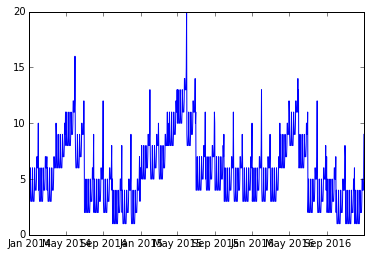

In [261]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def encode_date(date):
    return numpy.concatenate(date_enc.encodeEachField(DateRecord(date)))

def encode_bits(array):
    return set(numpy.concatenate(numpy.nonzero(array)))

def encode_date_bits(date):
    return encode_bits(encode_date(date))

year = 2015
day = datetime.date(year, 5, 31)
#jan1 = datetime.date(year, 1, 1)

days_in_year = [datetime.date(y, m, d) for y in [year-1, year, year+1] for m in range(1,13) for d in range(1, calendar.monthrange(y, m)[1] + 1)]
#days_in_year = [datetime.date(y, m, d) for y in range(year-15,year+16) for m in range(1,13) for d in range(1, calendar.monthrange(y, m)[1] + 1)]
day_bits = encode_date_bits(day)
overlap = [len(day_bits & encode_date_bits(date)) for date in days_in_year]
plt.plot(days_in_year, overlap)

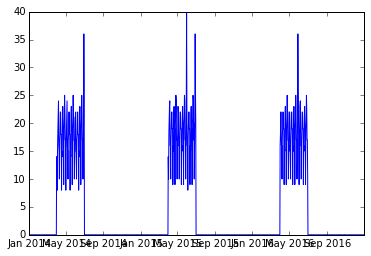

In [262]:
output = numpy.zeros((400,), dtype="int")
sp.compute(encode_date(day), learn=False, activeArray=output)
sp_day_bits = encode_bits(output)
overlap = []
for date in days_in_year:
    sp.compute(encode_date(date), learn=False, activeArray=output)
    overlap.append(len(sp_day_bits & encode_bits(output)))
plt.plot(days_in_year, overlap)

40


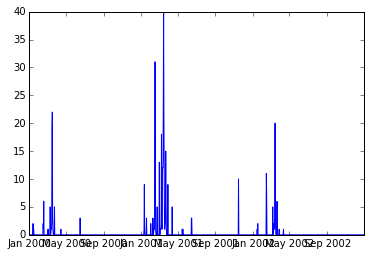

In [229]:
# sp2 = SpatialPooler(inputDimensions=(date_enc.width,),
#                    columnDimensions=(400,),
#                    potentialRadius=400,
#                    numActiveColumnsPerInhArea=40,
#                    globalInhibition=True,
#                    synPermActiveInc=0.03,
#                    potentialPct=1.0)

output = numpy.zeros((400,), dtype="int")
sp2.compute(encode_date(day), learn=True, activeArray=output)
sp_day_bits = encode_bits(output)
overlap = []
for date in days_in_year:
    sp2.compute(encode_date(date), learn=False, activeArray=output)
    overlap.append(len(sp_day_bits & encode_bits(output)))
print max(overlap)
plt.plot(days_in_year, overlap)

In [224]:
import pickle
with open("sp_date_500.p", "w") as f:
    pickle.dump(sp, f)


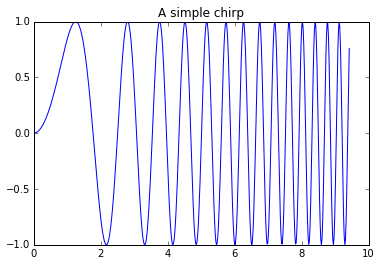

In [132]:


x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp')
plt.show()

#Encode Open, High, Low, Close

Encode day-on-day differences in each descriptor:  Open-Open, High-High, Low-Low, Close-Close.

In [33]:
import nupic
from nupic.encoders import ScalarEncoder
enc = ScalarEncoder(n=45, w=5, minval=-20, maxval=20, clipInput=True, forced=True)
# range for price descriptors
mrange = (-20, 20)  # not interested in specifics of daily price changes up or down greater than $20
precision = 1.0  # not interested in price changes of less than $1.00
for i in range(-20, 21):
    print str(enc.encode(i)).replace(" ", "").replace("\n", "") + "=" + str(i)

[111110000000000000000000000000000000000000000]=-20
[011111000000000000000000000000000000000000000]=-19
[001111100000000000000000000000000000000000000]=-18
[000111110000000000000000000000000000000000000]=-17
[000011111000000000000000000000000000000000000]=-16
[000001111100000000000000000000000000000000000]=-15
[000000111110000000000000000000000000000000000]=-14
[000000011111000000000000000000000000000000000]=-13
[000000001111100000000000000000000000000000000]=-12
[000000000111110000000000000000000000000000000]=-11
[000000000011111000000000000000000000000000000]=-10
[000000000001111100000000000000000000000000000]=-9
[000000000000111110000000000000000000000000000]=-8
[000000000000011111000000000000000000000000000]=-7
[000000000000001111100000000000000000000000000]=-6
[000000000000000111110000000000000000000000000]=-5
[000000000000000011111000000000000000000000000]=-4
[000000000000000001111100000000000000000000000]=-3
[000000000000000000111110000000000000000000000]=-2
[0000000000000000000

#Encode Volume
Encode volume directly as it already represents a rate of change in ownership.

In [39]:
import csv
import glob
import os
import sys
quote_path = "quotes/quantquote_daily_sp500_83986/daily/"
min_volume = sys.maxsize
max_volume = 0
for path in glob.iglob(os.path.join(quote_path, "*")):
    if path.endswith(".csv"):
        with open(path, 'rb') as csvfile:
            quote_reader = csv.reader(csvfile, delimiter=',') 
            for quote_line in quote_reader:
                volume = float(quote_line[-1])
                if volume > max_volume:
                    max_volume = volume
                if volume < min_volume:
                    min_volume = volume
print "min_volume=", str(min_volume)
print "max_volume=", str(max_volume)



min_volume= 0.0
max_volume= 7768849900.0


In [37]:
datetime.datetime.strptime("2015-05-27", "%Y-%m-%d").date()


datetime.date(2015, 5, 27)